In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
money = pd.read_csv("money.csv")

# merge dataframes: money[new_col] = ...

In [4]:
money.head(5) # head -> выводит указанное число строк

,Unnamed: 0,date,value
0,0,2018-01-10,57.0463
1,1,2018-01-11,56.8734
2,2,2018-01-12,56.9957
3,3,2018-01-13,56.6019
4,4,2018-01-16,56.3569


In [5]:
# Определение интервалов
# Глубина в прошлое ( дней * недель)
past = 7 * 4
# Глубина в будущее (дней * недель)
future = 7 * 1

In [6]:
df = list()

In [17]:
# len -> length -> длина

print("В датасете {} строк".format(len(money)))

В датасете 357 строк


In [19]:
our_array = [1, 2, 3]
print(our_array)

[1, 2, 3]


In [20]:
for i in range(4, 7):
    our_array.append(i)
    print(our_array)

[1, 2, 3, 4]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 6]


In [21]:
our_array[0]

1

In [22]:
our_array[3]

4

In [23]:
our_array[0:4] #конец не включается => 0, 1, 2, 3

[1, 2, 3, 4]

In [24]:
our_array[2:4] #конец не включается => 2, 3

[3, 4]

In [47]:
our_array[0:-4]

[1, 2]

In [35]:
df = list()
values = money["value"]

for i in range(past, len(money) - future):
    part_of_values = values[(i-past):(i+future)]
    df.append(list(part_of_values))

In [39]:
past_columns = [f"past_{i + 1}" for i in range(past)]
future_columns = [f"future_{i + 1}" for i in range(future)]

In [41]:
df = pd.DataFrame(df, columns=(past_columns + future_columns))

In [42]:
df.head(5)

,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,past_10,...,past_26,past_27,past_28,future_1,future_2,future_3,future_4,future_5,future_6,future_7
0,57.0463,56.8734,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,...,57.7701,57.5899,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717
1,56.8734,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,...,57.5899,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742
2,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,...,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334
3,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,...,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616
4,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,55.8288,...,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616,57.1000


In [44]:
X = df[past_columns][0:-1] # прошлое + строки за исключением последней
y = df[future_columns][0:-1] # будущему + строки за исключением последней

In [48]:
X_test = df[past_columns][-1:]
y_test = df[future_columns][-1:]

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
reg = LinearRegression().fit(X, y)

In [54]:
print(reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [59]:
prediction = reg.predict(X_test)[0]
print(prediction)

[65.01983218 64.9241458  64.88399836 64.85890282 64.86547712 64.83118503
 64.82545407]


In [60]:
print(y_test)

     future_1  future_2  future_3  future_4  future_5  future_6  future_7
321   64.7919   64.5158   64.6314   64.4326   64.3187   64.3352   63.9794


In [64]:
print(prediction - y_test)

     future_1  future_2  future_3  future_4  future_5  future_6  future_7
321  0.227932  0.408346  0.252598  0.426303  0.546777  0.495985  0.846054


In [61]:
print(np.linalg.norm(prediction - y_test))

1.3133976070933695


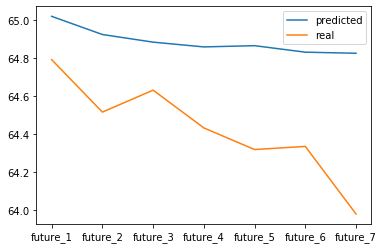

In [66]:
plt.plot(prediction, label="predicted") # label <- легенда
plt.plot(df[future_columns].iloc[-1], label="real") # iloc <- вытаскивает элемент на указанной позиции
plt.legend() # <- отрисовывает окошко с легендами

In [67]:
from sklearn.neighbors import KNeighborsRegressor

In [68]:
reg = KNeighborsRegressor(n_neighbors=5).fit(X, y)

In [69]:
prediction = reg.predict(X_test)[0]
print(prediction)

print(y_test)

[65.21936 65.16716 64.89924 64.66956 64.55446 64.50084 64.4225 ]
     future_1  future_2  future_3  future_4  future_5  future_6  future_7
321   64.7919   64.5158   64.6314   64.4326   64.3187   64.3352   63.9794


In [71]:
print(np.linalg.norm(prediction - y_test))

1.0070934443238118


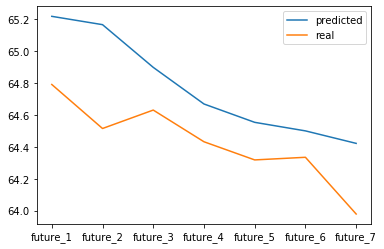

In [70]:
plt.plot(prediction, label="predicted") # label <- легенда
plt.plot(df[future_columns].iloc[-1], label="real") # iloc <- вытаскивает элемент на указанной позиции
plt.legend() # <- отрисовывает окошко с легендами

In [74]:
from sklearn import linear_model

In [75]:
reg = linear_model.LassoLars(alpha=.1).fit(X, y)

In [76]:
prediction = reg.predict(X_test)[0]
print(prediction)

print(y_test)

[64.56553676 64.57015297 64.57608652 64.58314057 64.59003024 64.59522758
 64.60243664]
     future_1  future_2  future_3  future_4  future_5  future_6  future_7
321   64.7919   64.5158   64.6314   64.4326   64.3187   64.3352   63.9794


In [77]:
print(np.linalg.norm(prediction - y_test))

0.780593173587177


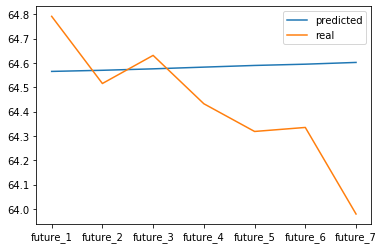

In [78]:
plt.plot(prediction, label="predicted") # label <- легенда
plt.plot(df[future_columns].iloc[-1], label="real") # iloc <- вытаскивает элемент на указанной позиции
plt.legend() # <- отрисовывает окошко с легендами

In [ ]:
# Домашнее задание
# датасет будем присылать

# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
# 1) настроить алгоритм, чтобы суммарная ошибка была меньше 0.780593173587177
# 2) добавить свой алгоритм из scikit-learn
# 3) pdf/html -> в опросник

# все должно работать
# все пункты должны быть выполнены

# оформление
# комментарии
# выводы

# дедлайн: 12:00 МСК 14.08.2019

In [79]:
from sklearn import neural_network

In [80]:
reg = neural_network.MLPRegressor()
reg = reg.fit(X, y)

In [81]:
prediction = reg.predict(X_test)[0]
print(prediction)

print(y_test)

print(np.linalg.norm(prediction - y_test))

[65.24653575 65.54515867 65.01201404 65.13434153 65.13948795 65.43584065
 65.07356581]
     future_1  future_2  future_3  future_4  future_5  future_6  future_7
321   64.7919   64.5158   64.6314   64.4326   64.3187   64.3352   63.9794
2.2329090146911947


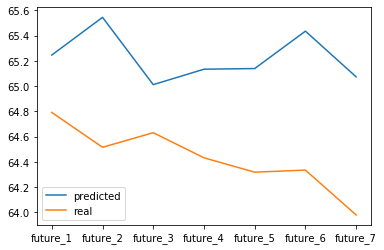

In [82]:
plt.plot(prediction, label="predicted") # label <- легенда
plt.plot(df[future_columns].iloc[-1], label="real") # iloc <- вытаскивает элемент на указанной позиции
plt.legend() # <- отрисовывает окошко с легендами